# Introduction

Since December 2019, a new coronavirus called 2019-nCoV (Covid-19) has started to spread worldwide. Despite the best efforts to take various measures including lockdown, vaccines, wearing masks, and social distance, more than 300 million people have been infected with the Covid-19 and more than 5.7 million people have died as a result as of today. The world's population is hoping that the pandemic will end soon, but new variants of the virus are emerging and making Covid-19 even worse. At this moment, what is the factors effect on the spread of Covid-19 and how they influence the daily case number has become a topic of concern for all.

This report use data from the Johns Hopkins University Center for Systems Science and Engineering to conduct the analysis about how the time, vaccination, and policies against Covid-19 affect the daily case number. It will mainly evaluate that wether the lockdown policy and vaccination have significant effect on reducing case number, and how the date correlated to the spread of Covid-19. At the end of report, I will also use the data to predict the trend of Covid-19 case numbers for different countries.

# Data Cleaning

The original data is from: https://github.com/CSSEGISandData/COVID-19. 

The dataset includes 280 countries or regions' data from 2020-01-22 to present. Although the dataset is keeping update, in this analysis we will only use the data from begin to 2022-01-31. The datas updated after this date could be used to vertify the prediction. 

Below is the code using for data cleaning.

In [1]:
import pandas as pd
import numpy as np
import qeds
import datetime

In [30]:
#Import data from csv file.
df = pd.read_csv(r'G:\UTSG\2022 Winter\ECO225\Project\dataset\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2002/1/22,2002/2/22,2002/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494,2304095
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,302569,303266,304002,304353,304656,304922,305047,305557,305959,306347


In [3]:
#Drop column that we don't need.
df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [4]:
#Some of the columns' name have error, filt them and rename them.
for label in df.columns:
    if '2' in label:
        if '200' in label:
            new_label = label[3:]
            df.rename(columns={label: new_label}, inplace=True)
df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727
1,NaN,Albania,0,0,0,0,0,0,0,0,...,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470
4,NaN,Angola,0,0,0,0,0,0,0,0,...,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,0,2,2,2,2,2,2,2,...,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494,2304095
276,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550
277,NaN,Yemen,0,0,0,0,0,0,0,0,...,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145
278,NaN,Zambia,0,0,0,0,0,0,0,0,...,302569,303266,304002,304353,304656,304922,305047,305557,305959,306347


In [5]:
#Group table by country/region and sum the data in same date for each country/region.
all_countries = df.groupby('Country/Region').sum()
all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, Afghanistan to Zimbabwe
Columns: 744 entries, 1/22/20 to 2/3/22
dtypes: int64(744)
memory usage: 1.1+ MB


Because there are too many countries or regions in the dataset, we only need some of them to conduct the analysis due to limited computer resources. Hence, we sour the data by the most recent confirmed case number and the average confirmed case number per day.

In [6]:
#Sort the data based on recent confirmed case number, from high to low.
top_10 = all_countries.sort_values('2/3/22', ascending=False).head(10)
top_10.columns.name = 'date'
top_10 = top_10.T

In [7]:
top_10.describe()

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Turkey,Italy,Germany,Spain
count,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02
mean,2.319419e+07,1.558173e+07,1.062299e+07,3.846743e+06,3.956968e+06,3.874643e+06,3.340866e+06,2.612273e+06,2.404701e+06,2.623829e+06
std,1.926551e+07,1.393541e+07,8.482975e+06,3.822190e+06,4.141759e+06,3.330946e+06,3.372480e+06,2.383780e+06,2.341424e+06,2.283373e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.207094e+06,1.423121e+06,2.415998e+06,2.200190e+05,3.008325e+05,8.096378e+05,2.258682e+05,2.460545e+05,2.065698e+05,2.724210e+05
50%,2.583301e+07,1.071062e+07,9.037624e+06,3.177474e+06,3.740046e+06,3.743120e+06,2.453478e+06,2.508327e+06,2.187120e+06,2.687552e+06
75%,3.516839e+07,3.170360e+07,1.994722e+07,6.212483e+06,5.913166e+06,6.213255e+06,5.753660e+06,4.356144e+06,3.778657e+06,4.461029e+06
max,7.596275e+07,4.195271e+07,2.610789e+07,2.027471e+07,1.772768e+07,1.209071e+07,1.194070e+07,1.134870e+07,1.072364e+07,1.019972e+07


<AxesSubplot:xlabel='date'>

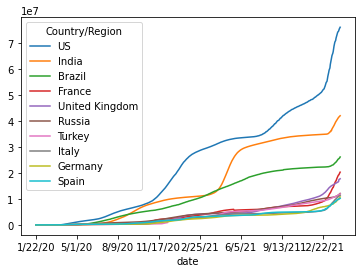

In [11]:
top_10.plot.line()

<AxesSubplot:xlabel='date'>

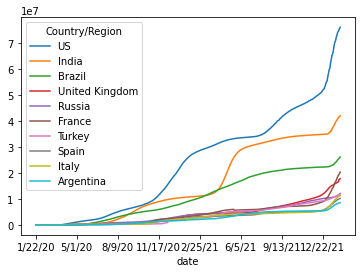

In [9]:
all_countries['per_day'] = all_countries.sum(axis=1) / all_countries.count(axis=1)
top_per_day = all_countries.sort_values('per_day', ascending=False).head(10)
top_per_day = top_per_day.T.drop('per_day')
top_per_day.plot.line()

In these two plot, the independent variables x are time and country/region, and the dependent variables y is the confirmed case number.

We found that in both situation, US, India, Brazil, UK, Russia, France, Turkey, Spain, and Italy (9 countries in total) belong to the top 10. The Germany and Argentina shows in different rank method. However, most of them have similar trending pattern. This means that in these countries/region, different location, demographic information, and geographic information do not affect the Covid-19 spreading pattern. 

Also, the number of confirmed cases in all these countries increased over time and started to show a significant increase in December 2021. This trend is consistent with what we know about the Covid-19 variant of the virus Omicron, which is spreading faster and with greater intensity.

In [23]:
#Import vaccination data from csv file.
vacc = pd.read_csv(r'G:\UTSG\2022 Winter\ECO225\Project\dataset\vaccination\country_vaccinations.csv')
vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74956,Zimbabwe,ZWE,2022-01-31,7570383.0,4270759.0,3299624.0,6193.0,7485.0,50.16,28.30,21.86,496.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
74957,Zimbabwe,ZWE,2022-02-01,7578422.0,4274653.0,3303769.0,8039.0,7550.0,50.21,28.32,21.89,500.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
74958,Zimbabwe,ZWE,2022-02-02,7593924.0,4282687.0,3311237.0,15502.0,8608.0,50.32,28.38,21.94,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
74959,Zimbabwe,ZWE,2022-02-03,7600946.0,4286198.0,3314748.0,7022.0,8296.0,50.36,28.40,21.96,550.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


# Future Steps
First, I intend to combine the 11 countries with the highest number of confirmed cases obtained above into a dataframe in the next step, and add the data from China. Although the number of confirmed cases in China is not relatively high, their data and related policies deserve to be studied and evaluated because China received a large impact at the begining of Covid-19 spreading, but rapidly reduced the number of confirmed cases later. 

Second,I will turn the existing index into DateTime format and try to graph the confirmations for different years to see if the number of confirmations for Covid-19 is related to a specific season and month. This information can help us determine if conditions such as temperature, holidays, special events, etc. affect the spread of Covid-19. If an effect is found, we can try to exclude the influence of these factors on the results of the subsequent analysis. 

Third, I will compile data on the lockdown levels of different countries at different times by studying the lockdown policies of these countries. Also, use the vaccination data of these countries for further analysis.

Fourth, I will conduct a regression analysis of vaccination rates, lockdown policy and confirmed numbers to determine whether vaccines and lockdown can help prevent the spread of COVID-19. If there are no significant changes, I would further analyze them using mortality and ICU rates for COVID-19 to determine whether these policies are helping to reduce the symptoms of those who are infected.  

Finally, I will summarize these influencing factors and try to use machine learning to predict the number of COVID-19 diagnoses in different countries in the future. I will verify and compare the prediction results with the subsequent data set released by JHU to check the accuracy of the prediction.